In [24]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from fastai.imports import *
from fastai.structured import *
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import sklearn.model_selection
from IPython.display import display
import math
import random
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import collections

In [26]:
PATH = "data/Cristano_Ronaldo_Final_v1/"

In [27]:
!ls {PATH}

amit_dubey_190199_code_4.csv  data.csv	sample_submission.csv
amit_dubey_190199_code_5.csv  __MACOSX


# Required Functions

In [28]:
def imae(x,y):
    return 1/(1+(abs(x-y)).mean())

In [29]:
def print_score(m):
    res = [
        imae(m.predict(X_train.drop(['Unnamed: 0'],axis=1)), y_train),
        imae(m.predict(X_valid.drop(['Unnamed: 0'],axis=1)), y_valid),
        m.score(X_train.drop(['Unnamed: 0'],axis=1), y_train), 
        m.score(X_valid.drop(['Unnamed: 0'],axis=1), y_valid),
          ]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [30]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)


# Data Pre-processing

In [31]:
df_i = pd.read_csv(f'{PATH}sample_submission.csv')
df_i.shot_id_number = df_i.shot_id_number-1
df_i=df_i.drop(['is_goal'], axis=1)

In [32]:
df_raw = pd.read_csv(f'{PATH}data.csv', low_memory=False, parse_dates=['date_of_game'])

In [33]:
df_raw.is_goal.value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [34]:
display_all(df_raw.T)

0                       1      \
Unnamed: 0                                  0                       1   
match_event_id                             10                      12   
location_x                                167                    -157   
location_y                                 72                       0   
remaining_min                              10                      10   
power_of_shot                               1                       1   
knockout_match                              0                       0   
game_season                           2000-01                 2000-01   
remaining_sec                              27                      22   
distance_of_shot                           38                      35   
is_goal                                   NaN                       0   
area_of_shot                    Right Side(R)            Left Side(L)   
shot_basics                         Mid Range               Mid Range   
range_of_shot                       16-24 ft.                8-16 ft.   
team_name                   Manchester United       Manchester United   
date_of_game              2000-10-31 00:00:00     2000-10-31 00:00:00   
home/away                          MANU @ POR              MANU @ POR   
shot_id_number                              1                       2   
lat/lng                45.539131, -122.651648  45.539131, -122.651648   
type_of_shot                        shot - 30               shot - 45   
type_of_combined_shot                     NaN                     NaN   
match_id                             20000012                20000012   
team_id                            1610612747              1610612747   
remaining_min.1                            10                      10   
power_of_shot.1                             1                       1   
knockout_match.1                       50.608                    28.8   
remaining_sec.1                          54.2                      22   
distance_of_shot.1                         38                      35   

                                        2                       3      \
Unnamed: 0                                  2                       3   
match_event_id                             35                      43   
location_x                               -101                     138   
location_y                                135                     175   
remaining_min                               7                       6   
power_of_shot                               1                       1   
knockout_match                              0                       0   
game_season                           2000-01                 2000-01   
remaining_sec                              45                      52   
distance_of_shot                           36                      42   
is_goal                                     1                       0   
area_of_shot             Left Side Center(LC)   Right Side Center(RC)   
shot_basics                         Mid Range               Mid Range   
range_of_shot                       16-24 ft.               16-24 ft.   
team_name                   Manchester United       Manchester United   
date_of_game              2000-10-31 00:00:00     2000-10-31 00:00:00   
home/away                                 NaN              MANU @ POR   
shot_id_number                              3                       4   
lat/lng                45.539131, -122.651648  45.539131, -122.651648   
type_of_shot                        shot - 25                     NaN   
type_of_combined_shot                     NaN                shot - 3   
match_id                             20000012                20000012   
team_id                            1610612747              1610612747   
remaining_min.1                         92.64                     NaN   
power_of_shot.1                             1                       1   
knockout_match.1        

In [35]:
df_raw['date_of_game'] = pd.to_datetime(df_raw.date_of_game)
df_raw=df_raw.sort_values('date_of_game')
display_all(df_raw.T)

22901                  22903  \
Unnamed: 0                             22901                  22903   
match_event_id                           102                    124   
location_x                              -140                   -142   
location_y                               116                    181   
remaining_min                              0                      8   
power_of_shot                              1                      2   
knockout_match                             0                      0   
game_season                          1996-97                1996-97   
remaining_sec                             42                     37   
distance_of_shot                          38                     43   
is_goal                                    0                      1   
area_of_shot            Left Side Center(LC)   Left Side Center(LC)   
shot_basics                        Mid Range              Mid Range   
range_of_shot                      16-24 ft.              16-24 ft.   
team_name                  Manchester United      Manchester United   
date_of_game             1996-11-03 00:00:00    1996-11-06 00:00:00   
home/away                       MANU vs. MIN             MANU @ CHH   
shot_id_number                         22902                  22904   
lat/lng                42.982923, -71.446094  35.205878, -80.841194   
type_of_shot                       shot - 18               shot - 9   
type_of_combined_shot                    NaN                    NaN   
match_id                            29600027               29600044   
team_id                           1610612747             1610612747   
remaining_min.1                            0                      8   
power_of_shot.1                            1                      2   
knockout_match.1                           0                      0   
remaining_sec.1                         48.2                     37   
distance_of_shot.1                        38                     43   

                                       22904                22905  \
Unnamed: 0                             22904                22905   
match_event_id                           144                  151   
location_x                               NaN                  -10   
location_y                                 0                  138   
remaining_min                              6                    5   
power_of_shot                              2                    2   
knockout_match                             0                    0   
game_season                          1996-97              1996-97   
remaining_sec                             34                   27   
distance_of_shot                          20                   33   
is_goal                                    0                    1   
area_of_shot                       Center(C)            Center(C)   
shot_basics                        Goal Area            Goal Line   
range_of_shot                Less Than 8 ft.             8-16 ft.   
team_name                  Manchester United    Manchester United   
date_of_game             1996-11-06 00:00:00  1996-11-06 00:00:00   
home/away                         MANU @ CHH           MANU @ CHH   
shot_id_number                         22905                22906   
lat/lng                35.205878, -80.841194                  NaN   
type_of_shot                             NaN                  NaN   
type_of_combined_shot               shot - 3             shot - 3   
match_id                            29600044             29600044   
team_id                           1610612747           1610612747   
remaining_min.1                        39.64                    5   
power_of_shot.1                            2                    2   
knockout_match.1                           0              100.928   
remaining_sec.1                           34                  NaN   
distance_of_shot.1                        20   

In [72]:
"""
I tried this but it lead to worse r^2 score :/ so its commented now
lst = [
    'is_goal',
    'knockout_match',
    'game_season',
    'shot_basics',
    'team_name',
    'home/away',
    'lat/lng',
    'type_of_combined_shot',
    'match_id',
    'team_id',
    'knockout_match.1',
]
for col in lst:
    df_raw[col].interpolate(method='nearest',inplace=True)
    """;

## train_cats
It change any columns of strings in a panda's dataframe to a column of
categorical values. This applies the changes inplace.

In [37]:
train_cats(df_raw)

In [38]:
cols = ['knockout_match','match_event_id', 'game_season', 'area_of_shot','shot_basics', 'range_of_shot', 'lat/lng', 'team_name',
       'home/away', 'shot_id_number',  'type_of_shot', 'type_of_combined_shot','match_id','team_id']

In [39]:
for col in cols:
    df_raw[col] = df_raw[col].astype('category').cat.codes

In [40]:
df_raw['year'] = df_raw['date_of_game'].dt.year
df_raw['month']=df_raw['date_of_game'].dt.month
df_raw=df_raw.drop(['date_of_game'],axis=1)

In [41]:
df_raw, __, ___ = proc_df(df_raw)

## proc_df
It takes a data frame df and splits off the response variable, and
changes the df into an entirely numeric dataframe. For each column of df 
which is not in skip_flds nor in ignore_flds, na values are replaced by the
median value of the column.

In [42]:
df_raw.match_event_id.value_counts()

-1      1563
 0       128
 2       102
 9        92
 276      88
 6        87
 15       86
 10       85
 4        85
 316      83
 247      82
 265      82
 335      82
 7        81
 24       81
 255      80
 22       80
 311      79
 100      79
 254      79
 11       79
 237      79
 86       79
 25       78
 71       78
 236      78
 240      78
 301      77
 14       77
 269      77
        ... 
 572       2
 581       2
 612       2
 596       2
 595       2
 579       2
 604       2
 594       2
 573       2
 577       2
 586       2
 588       1
 617       1
 603       1
 587       1
 606       1
 602       1
 592       1
 585       1
 616       1
 615       1
 599       1
 608       1
 614       1
 597       1
 611       1
 610       1
 609       1
 593       1
 607       1
Name: match_event_id, Length: 619, dtype: int64

In [43]:
df_tst = df_raw[df_raw['Unnamed: 0'].isin(df_i['shot_id_number'])]
df_trn = df_raw[~df_raw['Unnamed: 0'].isin(df_i['shot_id_number'])]

In [44]:
display_all(df_trn.T)

22901  22903  22904    22905  22907  22909  22910  \
Unnamed: 0             22901  22903  22904    22905  22907  22909  22910   
match_event_id           100    122    142      149    224    332    335   
location_x              -140   -142      0      -10    -64    -79   -103   
location_y               116    181      0      138    223    177    207   
remaining_min              0      8      6        5      2      1      1   
power_of_shot              1      2      2        2      2      3      3   
knockout_match             0      0      0        0      0     -1      0   
game_season                0      0      0        0     -1      0      0   
remaining_sec             42     37     34       27     16     53     14   
distance_of_shot          38     43     20       33     43     39     43   
is_goal                    0      1      0        1      1      0      1   
area_of_shot               1      1      0        0      0      1      1   
shot_basics                4      4      0        1      4      4      4   
range_of_shot              0      0      4        2      0      0      0   
team_name                  0      0      0        0      0      0      0   
home/away                 54      4      4        4     32     32     32   
shot_id_number         21701  21703  21704    21705  21706  21708  21709   
lat/lng                   31     13     13       -1     33     33     33   
type_of_shot              10     56     -1       -1     -1     20     -1   
type_of_combined_shot     -1     -1      3        3      3     -1      3   
match_id                1079   1081   1081     1081   1082   1082   1082   
team_id                    0      0      0        0      0      0      0   
remaining_min.1            0      8  39.64        5  35.64      1      1   
power_of_shot.1            1      2      2        2  50.36      3      3   
knockout_match.1           0      0      0  100.928      0   23.8      0   
remaining_sec.1         48.2     37     34       35     16     53     14   
distance_of_shot.1        38     43     20       33     43     39   31.4   
year                    1996   1996   1996     1996   1996   1996   1996   
month                     11     11     11       11     11     11     11   
location_x_na          False  False   True    False  False  False  False   
location_y_na          False  False  False    False  False  False  False   
remaining_min_na       False  False  False    False  False  False  False   
power_of_shot_na       False  False  False    False  False  False   True   
remaining_sec_na       False  False  False    False  False  False  False   
distance_of_shot_na    False  False  False    False  False  False  False   
is_goal_na             False  False  False    False  False  False  False   
remaining_min.1_na     False  False  False    False  False  False  False   
power_of_shot.1_na     False  False  False    False  False  False  False   
knockout_match.1_na    False  False  False    False  False  False  False   
remaining_sec.1_na     False  False  False     True  False  False  False   
distance_of_shot.1_na  False  False  False    False  False  False  False   
year_na                False  False  False    False  False  False  False   
month_na               False  False  False    False  False  False  False   

                       22911   22912   22913  22914  22915  22916  22918  \
Unnamed: 0             22911   22912   22913  22914  22915  22916  22918   
match_event_id           350     378     382    105    135    155    181   
location_x                 0    -155       0      0      0    -75    233   
location_y                 0     175       0      0     74    142     -1   
remaining_min              0       9       8      1     10      8      3   
power_of_shot              3       4       4      1      2      2      2   
knockout_match             0       0       0      0      0      0      0   
game_season                0      -1       0     -1     -1     -1     

In [45]:
df_trn.describe()

Unnamed: 0  match_event_id    location_x    location_y  \
count  25697.000000    25697.000000  25697.000000  25697.000000   
mean   15327.166946      235.127602      7.105421     90.453438   
std     8860.462397      155.817575    107.559386     85.810451   
min        1.000000       -1.000000   -250.000000    -44.000000   
25%     7645.000000       90.000000    -59.000000      7.000000   
50%    15335.000000      241.000000      0.000000     74.000000   
75%    22975.000000      358.000000     90.000000    156.000000   
max    30696.000000      616.000000    248.000000    791.000000   

       remaining_min  power_of_shot  knockout_match   game_season  \
count   25697.000000   25697.000000    25697.000000  25697.000000   
mean        4.891116       2.545122        0.089232      7.465619   
std         3.365993       1.128151        0.423581      5.988092   
min         0.000000       1.000000       -1.000000     -1.000000   
25%         2.000000       2.000000        0.000000      2.000000   
50%         5.000000       3.000000        0.000000      8.000000   
75%         8.000000       3.000000        0.000000     12.000000   
max        11.000000       7.000000        1.000000     19.000000   

       remaining_sec  distance_of_shot  ...  type_of_combined_shot  \
count   25697.000000      25697.000000  ...           25697.000000   
mean       28.274040         33.540569  ...               1.035335   
std        17.059008          9.145249  ...               2.093044   
min         0.000000         20.000000  ...              -1.000000   
25%        14.000000         26.000000  ...              -1.000000   
50%        28.000000         35.000000  ...              -1.000000   
75%        42.000000         40.000000  ...               3.000000   
max        59.000000         99.000000  ...               5.000000   

           match_id  team_id  remaining_min.1  power_of_shot.1  \
count  25697.000000  25697.0      25697.00000     25697.000000   
mean     736.540141      0.0         17.58273        15.321157   
std      450.100066      0.0         28.79283        29.025543   
min        0.000000      0.0          0.00000         1.000000   
25%      364.000000      0.0          3.00000         2.000000   
50%      702.000000      0.0          6.00000         3.000000   
75%     1095.000000      0.0         10.00000         4.000000   
max     1558.000000      0.0        128.76160       118.360000   

       knockout_match.1  remaining_sec.1  distance_of_shot.1          year  \
count      25697.000000     25697.000000        25697.000000  25697.000000   
mean          15.704833        38.708186           38.614416   2006.112503   
std           34.395589        29.047309           18.210277      4.707922   
min            0.000000         0.000000            9.400000   1996.000000   
25%            0.000000        18.000000           27.000000   2002.000000   
50%            0.000000        35.000000           36.000000   2006.000000   
75%            1.000000        51.000000           44.000000   2010.000000   
max          141.352320       144.785600          115.728000   2016.000000   

              month  
count  25697.000000  
mean       5.503561  
std        4.067419  
min        1.000000  
25%        2.000000  
50%        4.000000  
75%       11.000000  
max       12.000000  

[8 rows x 29 columns]

In [46]:
 X_train, X_valid, y_train, y_valid  = sklearn.model_selection.train_test_split(df_trn.drop(['is_goal'],axis=1), df_trn['is_goal'], test_size=0.20, random_state=42)

In [47]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((20557, 42), (5140, 42), (20557,), (5140,))

# Model Selection & Analysis

### set_rf_samples(n)
Changes Scikit learn's random forests to give each tree a random sample of n random rows.

In [67]:
set_rf_samples(100)

In [68]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, max_features=0.5, min_samples_leaf=5)
clf.fit(X_train.drop(['Unnamed: 0'],axis=1), y_train)
print_score(clf)

[0.7244502396391317, 0.7206954570947841, 0.6196429440093398, 0.6124513618677043]


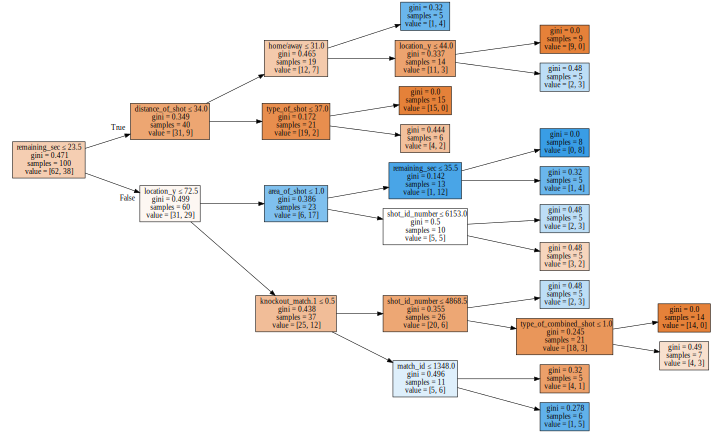

In [50]:
draw_tree(clf.estimators_[0], X_train.drop(['Unnamed: 0'],axis=1), precision=3)

In [51]:
pred_valid =  clf.predict(X_train.drop(['Unnamed: 0'],axis=1))
collections.Counter(pred_valid)

Counter({0.0: 15933, 1.0: 4624})

In [52]:
preds = np.stack([t.predict(X_valid.drop(['Unnamed: 0'],axis=1)) for t in clf.estimators_])
#preds[:,0], np.mean(preds[:,0]), y_valid[0]

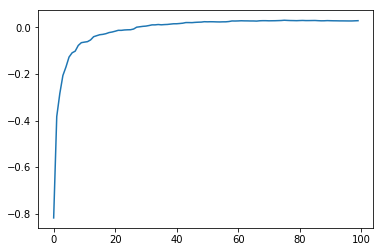

In [65]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(100)]);

# Feature Importance

In [54]:
fi = rf_feat_importance(clf, X_valid.drop(['Unnamed: 0'],axis=1))
fi[:]

cols       imp
2              location_y  0.068470
0          match_event_id  0.068415
8        distance_of_shot  0.065186
13              home/away  0.063609
23        remaining_sec.1  0.059963
1              location_x  0.057858
24     distance_of_shot.1  0.057441
7           remaining_sec  0.054528
18               match_id  0.051288
14         shot_id_number  0.049876
20        remaining_min.1  0.042990
6             game_season  0.040110
16           type_of_shot  0.036658
3           remaining_min  0.036567
25                   year  0.036102
15                lat/lng  0.035925
26                  month  0.035921
21        power_of_shot.1  0.026117
10            shot_basics  0.019469
9            area_of_shot  0.018344
22       knockout_match.1  0.016383
11          range_of_shot  0.015479
4           power_of_shot  0.013549
17  type_of_combined_shot  0.012213
33             is_goal_na  0.008094
5          knockout_match  0.001652
29       remaining_min_na  0.000874
38  distance_of_shot.1_na  0.000782
36    knockout_match.1_na  0.000740
31       remaining_sec_na  0.000680
12              team_name  0.000657
35     power_of_shot.1_na  0.000637
32    distance_of_shot_na  0.000617
30       power_of_shot_na  0.000574
39                year_na  0.000561
27          location_x_na  0.000492
34     remaining_min.1_na  0.000358
28          location_y_na  0.000307
37     remaining_sec.1_na  0.000280
40               month_na  0.000235
19                team_id  0.000000

# Final model

In [55]:
clf.fit(df_trn.drop(['Unnamed: 0','is_goal'],axis=1), df_trn['is_goal'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
df_tst = df_tst.drop(['is_goal'],axis=1)

In [57]:
df_trn.T

22901  22903  22904    22905  22907  22909  22910  \
Unnamed: 0             22901  22903  22904    22905  22907  22909  22910   
match_event_id           100    122    142      149    224    332    335   
location_x              -140   -142      0      -10    -64    -79   -103   
location_y               116    181      0      138    223    177    207   
remaining_min              0      8      6        5      2      1      1   
power_of_shot              1      2      2        2      2      3      3   
knockout_match             0      0      0        0      0     -1      0   
game_season                0      0      0        0     -1      0      0   
remaining_sec             42     37     34       27     16     53     14   
distance_of_shot          38     43     20       33     43     39     43   
is_goal                    0      1      0        1      1      0      1   
area_of_shot               1      1      0        0      0      1      1   
shot_basics                4      4      0        1      4      4      4   
range_of_shot              0      0      4        2      0      0      0   
team_name                  0      0      0        0      0      0      0   
home/away                 54      4      4        4     32     32     32   
shot_id_number         21701  21703  21704    21705  21706  21708  21709   
lat/lng                   31     13     13       -1     33     33     33   
type_of_shot              10     56     -1       -1     -1     20     -1   
type_of_combined_shot     -1     -1      3        3      3     -1      3   
match_id                1079   1081   1081     1081   1082   1082   1082   
team_id                    0      0      0        0      0      0      0   
remaining_min.1            0      8  39.64        5  35.64      1      1   
power_of_shot.1            1      2      2        2  50.36      3      3   
knockout_match.1           0      0      0  100.928      0   23.8      0   
remaining_sec.1         48.2     37     34       35     16     53     14   
distance_of_shot.1        38     43     20       33     43     39   31.4   
year                    1996   1996   1996     1996   1996   1996   1996   
month                     11     11     11       11     11     11     11   
location_x_na          False  False   True    False  False  False  False   
location_y_na          False  False  False    False  False  False  False   
remaining_min_na       False  False  False    False  False  False  False   
power_of_shot_na       False  False  False    False  False  False   True   
remaining_sec_na       False  False  False    False  False  False  False   
distance_of_shot_na    False  False  False    False  False  False  False   
is_goal_na             False  False  False    False  False  False  False   
remaining_min.1_na     False  False  False    False  False  False  False   
power_of_shot.1_na     False  False  False    False  False  False  False   
knockout_match.1_na    False  False  False    False  False  False  False   
remaining_sec.1_na     False  False  False     True  False  False  False   
distance_of_shot.1_na  False  False  False    False  False  False  False   
year_na                False  False  False    False  False  False  False   
month_na               False  False  False    False  False  False  False   

                       22911   22912   22913  ...  30542  30558   30564  \
Unnamed: 0             22911   22912   22913  ...  30542  30558   30564   
match_event_id           350     378     382  ...    143    270       5   
location_x                 0    -155       0  ...   -139   -113     -68   
location_y                 0     175       0  ...    -14    156     214   
remaining_min              0       9       8  ...      7     11      11   
power_of_shot              3       4       4  ...      2      3       1   
knockout_match             0       0       0  ...      1      1       1   
game_season                0      -1       0  ...      3      3       3   
rem

In [58]:
pred_tst = clf.predict(df_tst.drop(['Unnamed: 0'],axis=1))

In [59]:
pred_tst

array([0., 1., 0., ..., 0., 0., 1.])

In [60]:
df_ans=pd.DataFrame()
df_ans['id']=df_tst['Unnamed: 0']+1

In [61]:
df_ans['prediction']=pred_tst.astype('int')

In [62]:
df_ans=df_ans.sort_values('id')

In [63]:
#df_ans.prediction = df_ans.prediction.astype('int')
df_ans.to_csv(f'{PATH}/amit_dubey_190199_code_5.csv', index=False)

In [64]:
df_ans.T

0      7      16     19     32     33     34     35     36     \
id              1      8     17     20     33     34     35     36     37   
prediction      0      0      1      1      0      0      1      0      0   

            37     ...  30646  30648  30655  30659  30664  30668  30680  \
id             38  ...  30647  30649  30656  30660  30665  30669  30681   
prediction      0  ...      0      0      0      0      0      0      1   

            30682  30686  30693  
id          30683  30687  30694  
prediction      0      0      1  

[2 rows x 5000 columns]